# CCM Tutorial, Lecture II

In this lecture, we will explore how to control workflow in a code using conditionals and loops. For more information, we recommend reviewing some of the online documentation available at https://docs.python.org/2/tutorial/controlflow.html. We will also see how to make code more modular by creating user defined functions. 

## Conditionals & Comparisons in Python
    
### Conditionals in Python    
0. In Python, there are no "case" or "switch" options that are available in other languages, but we can get the same functionality by using dictionary mappings. However, this is beyond the scope of this tutorial. 
1. You will find that most things can be done using the if/elif/else syntax:
```
if condition:
    #do stuff
elif condition:
    #do stuff
else:
    #do stuff
```       

***All parts of the conditional are indented.*** Unlike other languages that use terms like "end" or "end if" (or perhaps make use of brackets like "{ }") to signify the block of code corresponding to an if-elseif-else, Python interprets everything in terms of indenting. This is also true in for-loops as we will see below.
       
### Comparison operators  (*LET a=3, b=5*)
==:	If the values of two operands are equal, then the condition becomes true.	*(a == b) is not true.*

!=:	If values of two operands are not equal, then condition becomes true.  *(a != b) is true.* (Alternatively, one could use `<>` in place of `!=`, but this is not very common.)

 ">":	If the value of left operand is greater than the value of right operand, then condition becomes true.	*(a > b) is not true.*

"<": If the value of left operand is less than the value of right operand, then condition becomes true.	*(a < b) is true.*

">=":	If the value of left operand is greater than or equal to the value of right operand, then condition becomes true.	*(a >= b) is not true.*

"<=":	If the value of left operand is less than or equal to the value of right operand, then condition becomes true.	*(a <= b) is true.*

We can use **and** and **or** to combine sets of comparison operators and **not** to negate a statement. 

Try changing different values of `x` in the code snippets below and see what happens.

In [1]:
import numpy as np
x = -1
if x >= 0 and not(x == 2 or x == 3):
    f = np.power(x,.5)/((x-2.0)*(x-3.0))
    print f
elif x < 0:
    print 'Square root of negative number'
    f = np.nan
elif x == 2.0:
    print 'Division by zero with different limits'
    f = np.nan

Square root of negative number


In [2]:
# if x > 1 or x < -1 f(x)=0
# elif x<= 0 f(x)=1+x
# else f(x)=1-x

x=-.25
if x> 1 or x< -1:
    f=0.0
elif x<=0:
    f=1.0+x
else: 
    f=1.0-x
print f

0.75


## Functions in Python 
In the code snippets above, a value of `x` serves as the input into a conditional statement that determines what output value `f` should be assigned based on the value of `x`. If we wish to use this functionality many times in the code, we would probably like to avoid writing the if/elif/else structure at each point where it is to be used for a variety of reasons including, but not limited to, the following:
- If we ever decide to change how `f` is computed, then we would have to find/replace every instance of it within the code.
- Even the most terse scientific code can easily become hundreds if not thousands of lines long, and we want to avoid making the code more difficult to read, use, and debug than is absolutely necessary. 

This motivates the development of user-defined functions in Python. The basic syntax is shown below.

```
def functionname( parameters ):
   """function_docstring"""
   function_suite
   return [expression]
```
### A brief discussion on docstrings and commenting in code
The (triple) quotes is where you put in a documentation string for your function.  It is entirely optional, but it is always a good idea to document your code even when it is entirely in the developmental/testing phase. There are some best practices that you can read about at https://docs.python.org/devguide/documenting.html or http://docs.python-guide.org/en/latest/writing/documentation/. 

Good tools such as Sphinx http://www.sphinx-doc.org/en/1.4.8/ can turn properly documented code into easy to read/navigate html files to help expand the community of users for any code you develop. For example, see http://ut-chg.github.io/BET/ where Sphinx was used to generate the documentation. 

### parameters and keyword arguments in a function
Notice that in the definition of the function, there is a `parameters` variable, which is often a list of parameters (as shown below). These are normally ordered **UNLESS** you supplement them with *keyword args* in the function call (i.e., when you actually use the function you may specify which argument corresponds to which parameter).  The next two code snippet illustrates this.

In [3]:
def myfun(x,y):
    if x<y:
        z = x+2*y
    else:
        z= x-2*y
    return z

print myfun(2,3)
print myfun(2.0,3.0)
print myfun(3.0,2.0) #switching order of inputs

print myfun(x=2,y=3.0) #keyword argument
print myfun(y=3.0,x=2.0) #switching the order of inputs of keyword arguments does nothing

# Above, try printing myfun(x=2,3.0). 
# The take home message? Once you commit to using keywords in a function call, then you better be all in.

print myfun('silly ','test')    

z = myfun(2,3)
print z

8
8.0
-1.0
8.0
8.0
silly testtest
8


Obviously Python does not use type-checking for functions, but it allows useful types of polymorphism.

Python also allows to set defaults within the parameter list of a function call.  Let's tweak myfun a little.

Defaults need to **come after** functions parameters with non-default values.

In [4]:
def myfun2(x=1,y=2):
    if x<y:
        z = x+2*y
    else:
        z= x-2*y
    return z

print myfun2()
print myfun2(1.0)
print myfun2(y=3)

5
5.0
7


**We can even pass a function to another function!**

In [5]:
print myfun(myfun2(),myfun2(y=3))

19


### Python is pass by reference OR pass by value

####  *Pass by reference*
This means Python passes the reference to the variable, not just the value.  This can cause some different behavior when certain *in place* operators are used.  Classes, numpy arrays, etc. are passed by reference.

#### *Pass by value* 
This means Python passes the value and creates a new copy within the function. Variables that are strings, floats, and ints are passed by value (*they are immutable data types* meaning that the value is left unchanged by the function).

Python variables created within a function also have local *scope*.
- *scope* usually refers to the visibility of variables. In other words, which parts of your program can see or use it.  ***Local scope*** usually means only within the called function. 

In [6]:
import numpy as np
def tester(var):
    var *= 2      #if var is mutable, replaces in place (pass-by-reference)
    print 'within tester, the passed variable is changed to \n var = ', var
    a = 3
    print 'tester changed a in the scope of the function to', a
    return

a=2
print 'before tester, a = ', a
tester(a)
print 'after tester, a = ', a
A=np.ones([2,2])
print 'before tester, \n A = ', A
tester(A)
print 'after tester, \n A = ', A
tester(A)
print 'after tester(2*A), \n A = ', A


before tester, a =  2
within tester, the passed variable is changed to 
 var =  4
tester changed a in the scope of the function to 3
after tester, a =  2
before tester, 
 A =  [[ 1.  1.]
 [ 1.  1.]]
within tester, the passed variable is changed to 
 var =  [[ 2.  2.]
 [ 2.  2.]]
tester changed a in the scope of the function to 3
after tester, 
 A =  [[ 2.  2.]
 [ 2.  2.]]
within tester, the passed variable is changed to 
 var =  [[ 4.  4.]
 [ 4.  4.]]
tester changed a in the scope of the function to 3
after tester(2*A), 
 A =  [[ 4.  4.]
 [ 4.  4.]]


### Wait a minute...

What if I want to do local work to a *mutable* data type (i.e. a numpy array) but not have the change reflected back after function exit?  

The answer is to not use *in place* operators like +=, \*=, etc.  `var = var*2` creates a local copy of var and adds 2 to every entry.

In [7]:
def tester2(var):
    var = var*2    #if mutable, creates local copy of var.
    print 'within tester2, the passed variable is changed to, \n input = ',var
    return 

A=np.eye(3) # creates 3x3 array with a_ii = 1, 0 otherwise.
print 'before tester2,\n A = ', A
tester2(A)
print 'after tester2,\n A = ', A

before tester2,
 A =  [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
within tester2, the passed variable is changed to, 
 input =  [[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]
after tester2,
 A =  [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## Looping in Python

### For loops

**Syntax** 
```
for iterator in list:
    #indent for the loop
    #do cool stuff in the loop
#noindent to close the loop'
```
The list can be strings, for example:
```
for string in ('Alpha','Romeo','Sailor','Foxtrot'):
    #string takes on values 'Alpha', 'Romeo', etc. in order.
    print string
```
    

You will commonly use the ``xrange`` command to build lists of numbers for iterating (see https://docs.python.org/2/library/functions.html#xrange).
This is better than ``range`` for long sets of numbers or if you break the loop earlier.

**SYNTAX** 
```
xrange(stop)  #assumes start=0
xrange(start, stop[, step])
```

Note that it **DOES NOT** execute the stop value.

Let's  sum the first 20 terms of the geometric series corresponding to $2^{-x}$

In [8]:
sum=0
for n in xrange(20):   #identical so xrange(0,20) or xrange(0,20,1)
    sum += 2**(-n)
    print n, 'Sum = ', sum
    
print 'Now start subtracting from the sum'
    
for n in xrange(19,-1,-1): #you need the colon
    sum -= 2**(-n)  #all the things at the level of the loop get one indent
    print n, 'Sum = ', sum #done with the loop variable

0 Sum =  1
1 Sum =  1.5
2 Sum =  1.75
3 Sum =  1.875
4 Sum =  1.9375
5 Sum =  1.96875
6 Sum =  1.984375
7 Sum =  1.9921875
8 Sum =  1.99609375
9 Sum =  1.998046875
10 Sum =  1.9990234375
11 Sum =  1.99951171875
12 Sum =  1.99975585938
13 Sum =  1.99987792969
14 Sum =  1.99993896484
15 Sum =  1.99996948242
16 Sum =  1.99998474121
17 Sum =  1.99999237061
18 Sum =  1.9999961853
19 Sum =  1.99999809265
Now start subtracting from the sum
19 Sum =  1.9999961853
18 Sum =  1.99999237061
17 Sum =  1.99998474121
16 Sum =  1.99996948242
15 Sum =  1.99993896484
14 Sum =  1.99987792969
13 Sum =  1.99975585938
12 Sum =  1.99951171875
11 Sum =  1.9990234375
10 Sum =  1.998046875
9 Sum =  1.99609375
8 Sum =  1.9921875
7 Sum =  1.984375
6 Sum =  1.96875
5 Sum =  1.9375
4 Sum =  1.875
3 Sum =  1.75
2 Sum =  1.5
1 Sum =  1.0
0 Sum =  0.0


### While loops 

We often use ***while*** loops for iterative methods, such as fixed-point iterations. These are typically used when we are unsure exactly how many iterations a process should take.

```
while condition:   #this condition is true
    do something cool
    update condition, or use break or continue for loop control
#no indent as at end of loop
```
If the the ``condition`` never becomes false, then this will result in an infinite loop, so be careful. It is therefore fairly common practice to include some type of counter which tracks the number of iterations, and negating the condition if the counter reaches a specified value.

You can also exit from any for loop by using ``break`` to exit the innermost loop, and ``continue`` to continue to the next iteration of this loop

Let's look at an example where we are trying to iterate a logistic equation $x_{n+1}=a*x_n*(1-x_n)$ until we arrive at a fixed point:

In [9]:
import math as m
#from math import fabs  #absolute value function
a = 2.0
xnew = .1
tol = 1E-8
doit = True  #boolean True and False 
while doit:
    xold = xnew
    xnew *= a * (1-xnew)
    if m.fabs(xnew-xold) > tol:
        print 'Iterating, X = ', xnew
        #continue  #play it again, Sam
    else:
        break
    print 'This is skipped if the continue command is not commented out above.'
print "Fixed Point=",xnew

Iterating, X =  0.18
This is skipped if the continue command is not commented out above.
Iterating, X =  0.2952
This is skipped if the continue command is not commented out above.
Iterating, X =  0.41611392
This is skipped if the continue command is not commented out above.
Iterating, X =  0.485926251164
This is skipped if the continue command is not commented out above.
Iterating, X =  0.499603859187
This is skipped if the continue command is not commented out above.
Iterating, X =  0.499999686145
This is skipped if the continue command is not commented out above.
Iterating, X =  0.5
This is skipped if the continue command is not commented out above.
Fixed Point= 0.5


# Exercise: Simple Finite-Difference Discretization of a PDE

Recall the following simplified form of the heat equation seen in Lecture I:

\begin{equation}
\Large \left\{\begin{array}{l}\frac{\partial T}{\partial t} - \alpha_x\frac{\partial^2 T}{\partial x^2}  - \alpha_y\frac{\partial^2 T}{\partial y^2} = f(x,y,t), &(x,y,t)\in\Omega\times(0,t_f] \\
 \nabla T(x,y,t) \cdot \mathbf{n} = g(x,y,t), & (x,y,t)\in\partial\Omega\times(0,t_f] \\
 T(x,y,0) = h(x,y), & (x,y)\in\Omega
 \end{array}\right.
\end{equation}

Let $\Omega = (0,1)\times (0,1)$ and $t_f = \ln(10)$ as before. 

Suppose to discretize $\overline{\Omega}$ we use a regular grid of $(M_x+1)\times (M_y+1)$ points as shown in the figure below so that $$\large x_i = i\Delta_x, 0\leq i\leq M_x, \text{ where } \Delta_x = \frac{1}{M_x},$$
and
$$ \large y_j = j\Delta_y, 0\leq j\leq M_y, \text{ where } \Delta_y = \frac{1}{M_y}.$$
![title](imgs/FD-mesh-space-2D.png)

To discretize $[0,t_f]$, use a uniform grid of $N+1$ points $$\large 0=t_0<t_1<t_2<\cdots<t_N=t_f, \text{ where } t_n = n\Delta_t, 0\leq n\leq N, \text{ and } \Delta_t=\frac{t_f}{N}.$$

Let $T_{i,j}^n$ denote the approximation to $T(x,y,t)$ at the point in space-time given by $(x_i,y_j,t_n)$. 

Then, using centered finite difference schemes in space and a forward Euler scheme in space, we have the following equations that depend upon the choice of $(x_i,y_j)$.
* If $0<i<M_x$ and $0<j<M_y$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $i=0$ and $0< j < M_y$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + \color{blue}{\left[T_{i+1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]}}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $i=M_x$ and $0< j< M_y$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{\color{blue}{\left[T_{i-1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $0<i<M_x$ and $j=0$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + \color{red}{\left[T_{i,j+1}^n+2\Delta_yg(x_i,y_j,t_n)\right]}}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $0<i<M_x$ and $j=M_y$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{\color{red}{\left[T_{i,j-1}^n+2\Delta_yg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $i=0$ and $j=0$, then
$$
\Large 
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + \color{blue}{\left[T_{i+1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]}}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n +  \color{red}{\left[T_{i,j+1}^n+2\Delta_yg(x_i,y_j,t_n)\right]}}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $i=0$ and $j=M_y$, then
$$
\Large 
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + \color{blue}{\left[T_{i+1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]}}{\Delta_x^2} + \alpha_y\frac{\color{red}{\left[T_{i,j-1}^n+2\Delta_yg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else-If $i=M_x$ and $j=0$, then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{\color{blue}{\left[T_{i-1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + \color{red}{\left[T_{i,j+1}^n+2\Delta_yg(x_i,y_j,t_n)\right]}}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

* Else (when $i=M_x$ and $j=M_y$), then
$$
\Large
T_{i,j}^{n+1} = T_{i,j}^n + \Delta_t \left(\alpha_x\frac{\color{blue}{\left[T_{i-1,j}^n+2\Delta_xg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta_x^2} + \alpha_y\frac{\color{red}{\left[T_{i,j-1}^n+2\Delta_yg(x_i,y_j,t_n)\right]} - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta_y^2} + f(x_i,y_j,t_n)\right)
$$

Assume that $\alpha_x=\alpha_y = 1/2\pi^2$, $h(x,y) = \sin(\pi x)\sin(\pi y)$, $f(x,y,t) \equiv 0$ for all $(x,y,t)\in\Omega\times(0,t_f]$, and $g(x,y,t)=-10\pi \exp(-t)\sin(\pi y)$ if $x=0$ or $x=1$ and $g(x,y,t)=-10\pi\exp(-t)\sin(\pi x)$ if $y=0$ or $y=1$.
### Do the following (be very careful with the indexing using `meshgrid`):

* Step 1: Create user-defined functions called `eval_f`, `eval_h`, and `eval_g` for evaluating the "data" $f$, $h$, and $g$ at points in the space-time domain.


* Step 2: Create a user-defined function called `get_T_new` for determining $T_{i,j}^{n+1}$ where the first three inputs are the indices `i`, `j`, and the ***array*** `T_old`, the next inputs are the required values of $f$ and $g$ followed by the values of `M_x`, `M_y`, and `N`, and for the last inputs ($\alpha_x$ and $\alpha_y$) use defaults values so that these inputs are optional. This function should include an if-elif-else structure and return a ***scalar*** `T_new`.


* Step 3: Define  `M_x=5`, `M_y=5`, and `N=int(np.log(10)*M_x**2)` and use a nested for-loop to initialize $T_{i,j}^0$ using the `eval_h` function. Make a plot to verify you have initialized this array properly. 


* Step 4: Use nested for-loops for all space-time points $(x_i,y_j,t_n)$ to construct $T_{i,j}^{n}$, plot this approximation at $t_1$, $t_{int(N/2)}$, and $t_{-1}$ and plot the errors at these same times using a single figure with subplots on a $2\times 3$ array. To compute the errors, recall from the first lecture that the exact solution is given by
$$
  \large  T(x,y,t) = 10 e^{-t} \sin(\pi x)\sin(\pi y)
$$


* Step 5: Compute and plot the maximum absolute spatial error as a function of time. *Hint: Use `np.max`*


* Step 6 [Optional]: Use a while-loop to double `M_x`, `M_y`, and `N` until either the maximum spatial error is less than a tolerance of `1E-4` for all time or until `M_x` is greater than `40`.  

Step 1. Create the user-defined functions for evaluating the data

In [10]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

def eval_f(x_i, y_j, t_n):
    return 0

def eval_h(x_i,y_j):
    z = 10*np.sin(np.pi*x_i)*np.sin(np.pi*y_j)
    return z

def eval_g(x_i, y_j, t_n):
    if x_i == 0.0 or x_i == 1.0:
        z = -10*np.pi*np.exp(-t_n)*np.sin(np.pi*y_j)
    else:
        z = -10*np.pi*np.exp(-t_n)*np.sin(np.pi*x_i)
    return z

Step 2. Create the user-defined function `get_T_new`

In [11]:
def get_T_new( i, j, T_old, f_val, g_val, M_x, M_y, N, alpha_x = 1/(2*np.pi**2), alpha_y = 1/(2*np.pi**2)):
    Delta_x = 1./M_x
    Delta_y = 1./M_y
    Delta_t = np.log(10)/N
    if ( 0 < i ) & ( i < M_x ) & ( 0 < j ) & ( j < M_y ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    elif ( i == 0 ) & ( 0 < j ) & ( j < M_y ): 
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+(T_old[j,i+1] + 2*Delta_x*g_val)) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    elif (i == M_x ) & ( 0 < j ) & ( j < M_y ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * ((T_old[j,i-1]+2*Delta_x*g_val)-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    elif ( 0 < i ) & ( i < M_x ) & ( j == 0 ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+(T_old[j+1,i]+2*Delta_y*g_val)) + f_val)
        
    elif ( 0 < i ) & ( i < M_x ) & ( j== M_y ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * ((T_old[j-1,i]+2*Delta_y*g_val)-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    elif ( i == 0 ) & ( j == 0 ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+(T_old[j,i+1] + 2*Delta_x*g_val)) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+(T_old[j+1,i]+2*Delta_y*g_val)) + f_val)
        
    elif ( i == 0 ) & ( j == M_y ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * (T_old[j,i+1]-2*T_old[j,i]+(T_old[j,i+1] + 2*Delta_x*g_val)) + \
            alpha_y / Delta_y**2 * ((T_old[j-1,i]+2*Delta_y*g_val)-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    elif ( i == M_x ) & ( j == 0 ):
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * ((T_old[j,i-1]+2*Delta_x*g_val)-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * (T_old[j+1,i]-2*T_old[j,i]+(T_old[j+1,i]+2*Delta_y*g_val)) + f_val)
        
    else:
        
        T_new = T_old[j,i] + Delta_t * (alpha_x / Delta_x**2 * ((T_old[j,i-1]+2*Delta_x*g_val)-2*T_old[j,i]+T_old[j,i-1]) + \
            alpha_y / Delta_y**2 * ((T_old[j-1,i]+2*Delta_y*g_val)-2*T_old[j,i]+T_old[j-1,i]) + f_val)
        
    return T_new

Step 3: Create the grid and initialize the $T_{i,j}^0$ array.

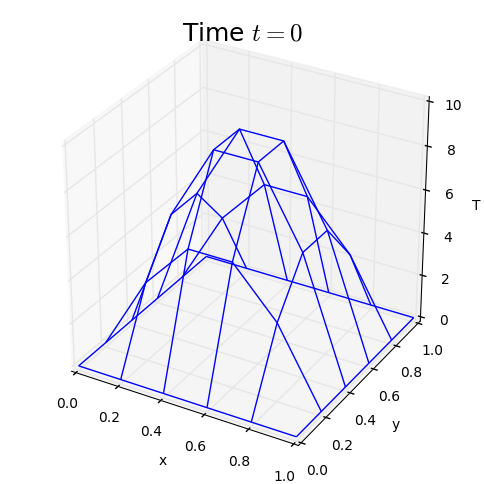

In [12]:
M_x = 5
M_y = 5
N = int(np.log(10)*M_x**2)

x = np.linspace(0,1,M_x+1)
y = np.linspace(0,1,M_y+1)
t = np.linspace(0,np.log(10),N+1)
x, y, t = np.meshgrid(x,y,t,indexing="xy")

T = 0*x #initialize T array
for i in range(0,M_x+1):
    for j in range(0,M_y+1):
        T[j,i,0] = eval_h(x[j,i,0],y[j,i,0])

fig = plt.figure(1, figsize=(6,6))

ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,0]) #we then plot A over this grid as a scatter plot
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('T')
ax1.set_zlim([0,10])
ax1.set_title('Time $t=0$', fontsize=18)

Step 4: Loop through the space-time points to evaluate $T_{i,j}^n$ and plot at $t_1$, $t_{N/2}$ and $t_{-1}$

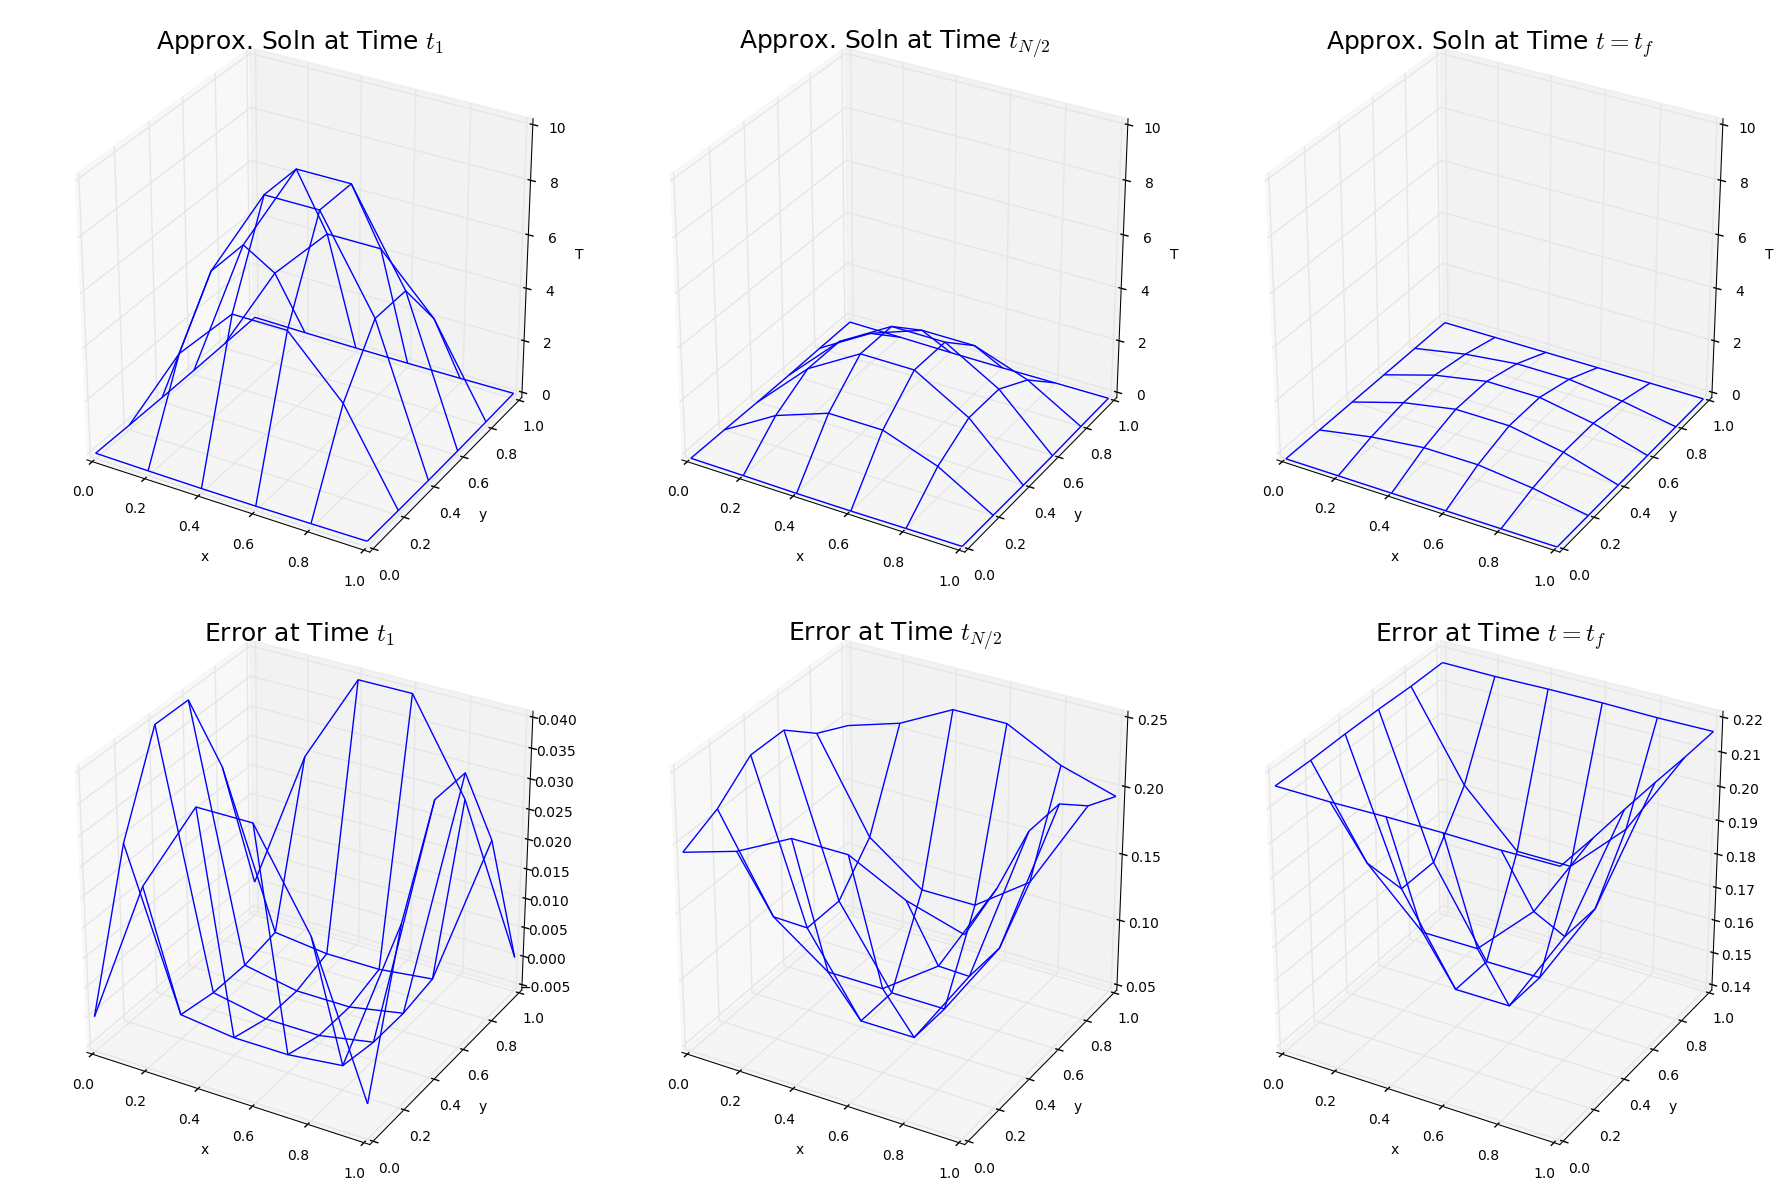

In [13]:
for n in range(0,N):
    for i in range(0,M_x+1):
        for j in range(0,M_y+1):
            g_val = eval_g(x[j,i,n],y[j,i,n],t[j,i,n])
            f_val = eval_f(x[j,i,n],y[j,i,n],t[j,i,n])
            T[j,i,n+1] = get_T_new(i, j, T[:,:,n], f_val, g_val, M_x, M_y, N)

T_exact = 10*np.exp(-t)*np.sin(np.pi*x)*np.sin(np.pi*y)

fig = plt.figure(1, figsize=(18,12))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,1]) #we then plot A over this grid as a scatter plot
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('T')
ax1.set_zticks([0,2,4,6,8,10])
ax1.set_zlim([0,10])
ax1.set_title('Approx. Soln at Time $t_1$', fontsize=18)

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax2.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,int(N/2)]) #we then plot A over this grid as a wireframe
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('T')
ax2.set_zticks([0,2,4,6,8,10])
ax2.set_zlim([0,10])
ax2.set_title('Approx. Soln at Time $t_{N/2}$', fontsize=18)

ax3 = fig.add_subplot(2, 3, 3, projection='3d')
ax3.plot_wireframe(x[:,:,0], y[:,:,0], T[:,:,-1]) #we then plot A over this grid as a surface
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('T')
ax3.set_zticks([0,2,4,6,8,10])
ax3.set_zlim([0,10])
ax3.set_title('Approx. Soln at Time $t=t_f$', fontsize=18)

ax4 = fig.add_subplot(2, 3, 4, projection='3d')
ax4.plot_wireframe(x[:,:,0], y[:,:,0], T_exact[:,:,1]-T[:,:,1]) #we then plot A over this grid as a scatter plot
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Error at Time $t_1$', fontsize=18)

ax5 = fig.add_subplot(2, 3, 5, projection='3d')
ax5.plot_wireframe(x[:,:,0], y[:,:,0], T_exact[:,:,int(N/2)]-T[:,:,int(N/2)]) #we then plot A over this grid as a wireframe
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_title('Error at Time $t_{N/2}$', fontsize=18)

ax6 = fig.add_subplot(2, 3, 6, projection='3d')
ax6.plot_wireframe(x[:,:,0], y[:,:,0], T_exact[:,:,-1]-T[:,:,-1]) #we then plot A over this grid as a surface
ax6.set_xlabel('x')
ax6.set_ylabel('y')
ax6.set_title('Error at Time $t=t_f$', fontsize=18)

fig.tight_layout()

plt.show()

Step 5: Compute and plot the maximum spatial error as a function of time using `np.max` to get the maximum spatial error.

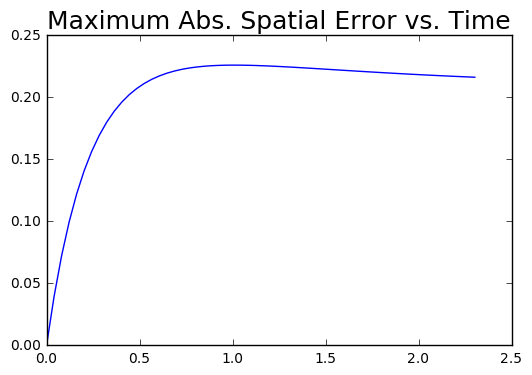

In [14]:
max_spatial_error = np.zeros(N+1)
for n in range(0,N+1):
    max_spatial_error[n] = np.max(T_exact[:,:,n]-T[:,:,n])

plt.title('Maximum Abs. Spatial Error vs. Time', fontsize=18)
plt.plot(t[0,0,:],max_spatial_error)

Step 6 [Optional]: Combine parts of Steps 3 and 4 below inside of a while-loop that increases the number of grid points until either an error tolerance or a maximum number of grid points is reached. 

Use the code block below for testing things.